# Time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime

## Import the data

In [2]:
df=pd.read_csv("data/malaria_cases.csv")

### *Reset so that the count and the year are column names*

In [3]:
df.head()

,county,year,month,value
0,Baringo County,2019,1,4832
1,Bomet County,2019,1,855
2,Bungoma County,2019,1,26851
3,Busia County,2019,1,71686
4,Elgeyo Marakwet County,2019,1,1334


## Add a date column


In [4]:
df["date"]=df.apply(lambda row:   datetime.datetime(row["year"],row["month"],1), axis=1)
df["date1"]=df["date"]

## Set the data column as the index column

In [5]:
df1=df.set_index("date", drop=True)
df1.head()

,county,year,month,value,date1
date,,,,,
2019-01-01,Baringo County,2019,1,4832,2019-01-01
2019-01-01,Bomet County,2019,1,855,2019-01-01
2019-01-01,Bungoma County,2019,1,26851,2019-01-01
2019-01-01,Busia County,2019,1,71686,2019-01-01
2019-01-01,Elgeyo Marakwet County,2019,1,1334,2019-01-01


In [6]:
df1.drop(["year", "month"], axis=1, inplace=True)

In [7]:
#list of counties
counties=list(df1["county"].unique()) # To be used in a drop down in the dashboard
print(counties)

['Baringo County', 'Bomet County', 'Bungoma County', 'Busia County', 'Elgeyo Marakwet County', 'Embu County', 'Garissa County', 'Homa Bay County', 'Isiolo County', 'Kajiado County', 'Kakamega County', 'Kericho County', 'Kiambu County', 'Kilifi County', 'Kirinyaga County', 'Kisii County', 'Kisumu County', 'Kitui County', 'Kwale County', 'Laikipia County', 'Lamu County', 'Machakos County', 'Makueni County', 'Mandera County', 'Marsabit County', 'Meru County', 'Migori County', 'Mombasa County', 'Muranga County', 'Nairobi County', 'Nakuru County', 'Nandi County', 'Narok County', 'Nyamira County', 'Nyandarua County', 'Nyeri County', 'Samburu County', 'Siaya County', 'Taita Taveta County', 'Tana River County', 'Tharaka Nithi County', 'Trans Nzoia County', 'Turkana County', 'Uasin Gishu County', 'Vihiga County', 'Wajir County', 'West Pokot County']


### Plot the time series

In [8]:
def plot(x,y, format="-r", lineLabel="", xLabel="",yLabel=""):
     ax.plot(x,y, format, label=lineLabel)
     ax.legend(loc=2)
     ax.set_xlabel(xLabel)
     ax.set_ylabel(yLabel)
     ax.set_xticks(x)
      
    

### *Consider only Nairobi County*

In [9]:
df2=df1[df1["county"]=="Nairobi County"]

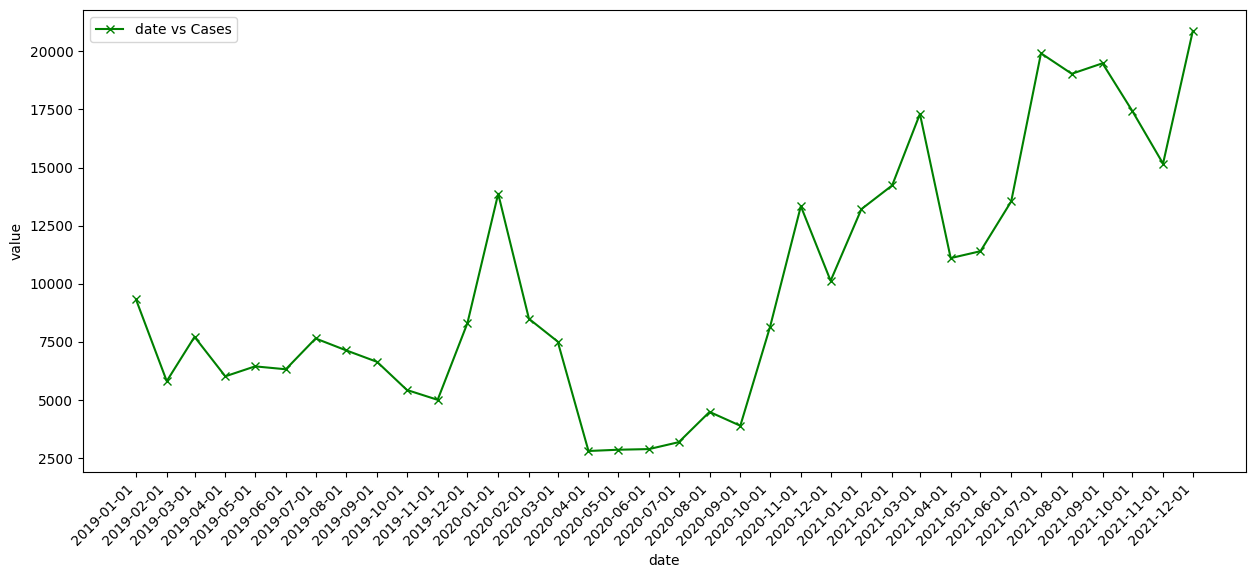

In [10]:
plt.rcParams['figure.figsize']=(15,6)
fig, ax=plt.subplots()
plot(df2.index,df2.value,"-gx",lineLabel=r"date vs Cases",  xLabel="date",yLabel="value")
plt.xticks(rotation=45, ha='right')
plt.show() 
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

## Plot the three years stacked together

In [11]:
x=df2["date1"].dt.month
df2["month"]=x
print(x)

date
2019-01-01     1
2019-02-01     2
2019-03-01     3
2019-04-01     4
2019-05-01     5
2019-06-01     6
2019-07-01     7
2019-08-01     8
2019-09-01     9
2019-10-01    10
2019-11-01    11
2019-12-01    12
2020-01-01     1
2020-02-01     2
2020-03-01     3
2020-04-01     4
2020-05-01     5
2020-06-01     6
2020-07-01     7
2020-08-01     8
2020-09-01     9
2020-10-01    10
2020-11-01    11
2020-12-01    12
2021-01-01     1
2021-02-01     2
2021-03-01     3
2021-04-01     4
2021-05-01     5
2021-06-01     6
2021-07-01     7
2021-08-01     8
2021-09-01     9
2021-10-01    10
2021-11-01    11
2021-12-01    12
Name: date1, dtype: int64


/tmp/ipykernel_7030/3234409610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["month"]=x


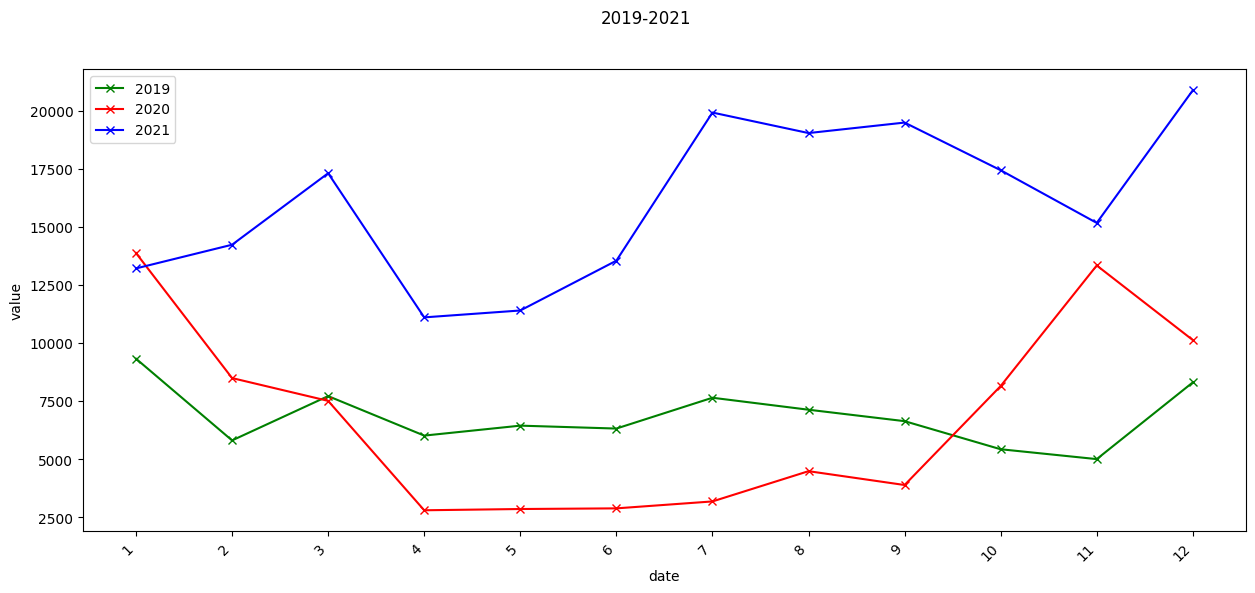

In [12]:
plt.rcParams['figure.figsize']=(15,6)
fig, ax=plt.subplots()
df3=df2[df2["date1"].dt.year==2019]
plot(df3.month,df3.value,"-gx",lineLabel=r"2019", xLabel="date",yLabel="value")
df3=df2[df2["date1"].dt.year==2020]
plot(df3.month,df3.value,"-rx",lineLabel=r"2020", xLabel="date",yLabel="value")
df3=df2[df2["date1"].dt.year==2021]
plot(df3.month,df3.value,"-bx",lineLabel=r"2021", xLabel="date",yLabel="value")
plt.xticks(rotation=45, ha='right')
fig.suptitle("2019-2021")
plt.show() 
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

# Time Series decomposition

### A time series can be decomposed into its components wich are
<font color=green>
    - Seasonality (repeating after some interval)<br>
    - Trend (increasing or decreasing)<br>
    - base level (a straight line of the mean value)<br>
    - error (Residual)
</font>

### We use *seasonal_decompose* from the *statsmodels* to decompose our time series


### The are two types of decomposition
- Additive -- Base level + Seasonality + Trend + Error
- Multiplication -- Base level * Seasonality * Trend * Error

### *We decompose with each of them to see which one applies*

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [14]:
x=pd.date_range(start="2019-01-31", end="2021-12-31", periods=None, freq="M")
df2.index=x
df2.head()

,county,value,date1,month
2019-01-31,Nairobi County,9329,2019-01-01,1
2019-02-28,Nairobi County,5814,2019-02-01,2
2019-03-31,Nairobi County,7719,2019-03-01,3
2019-04-30,Nairobi County,6021,2019-04-01,4
2019-05-31,Nairobi County,6449,2019-05-01,5


In [15]:
#Multiplicative decomposition
resultMulti= seasonal_decompose(df2['value'], model='multiplicative')
#Additive Decomposition
resultAdd = seasonal_decompose(df2['value'], model='additive')

### Plotting

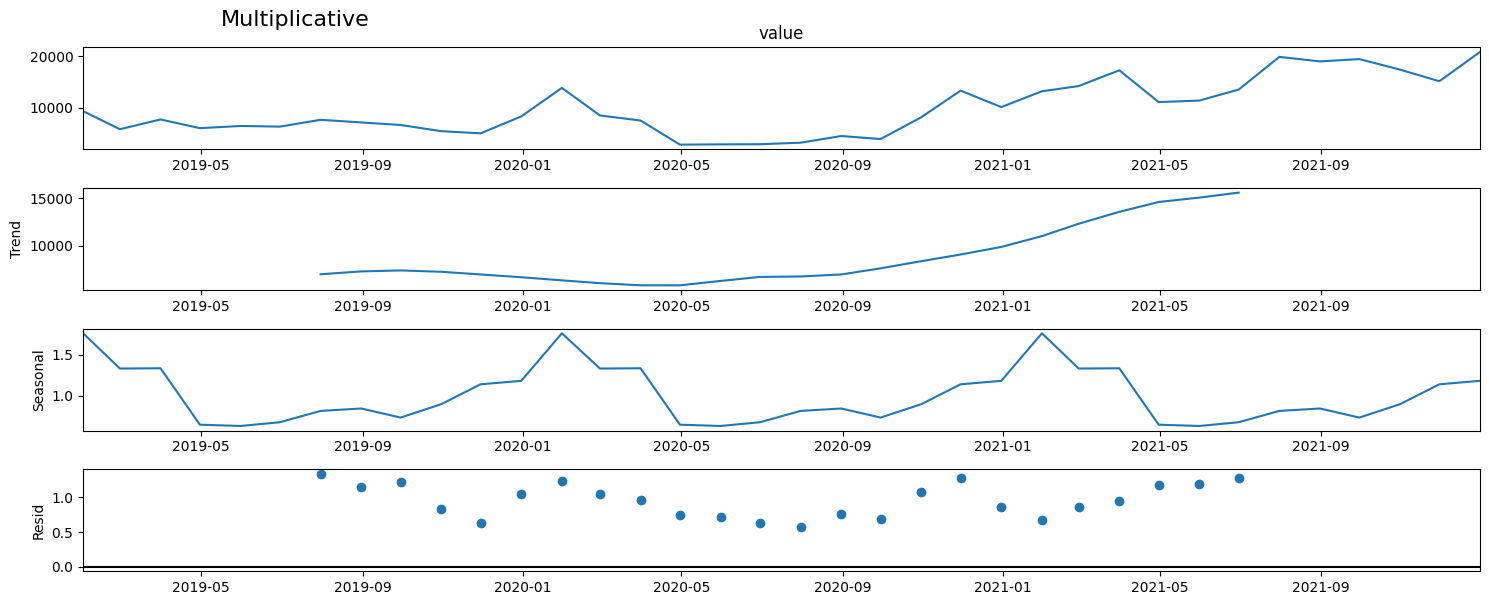

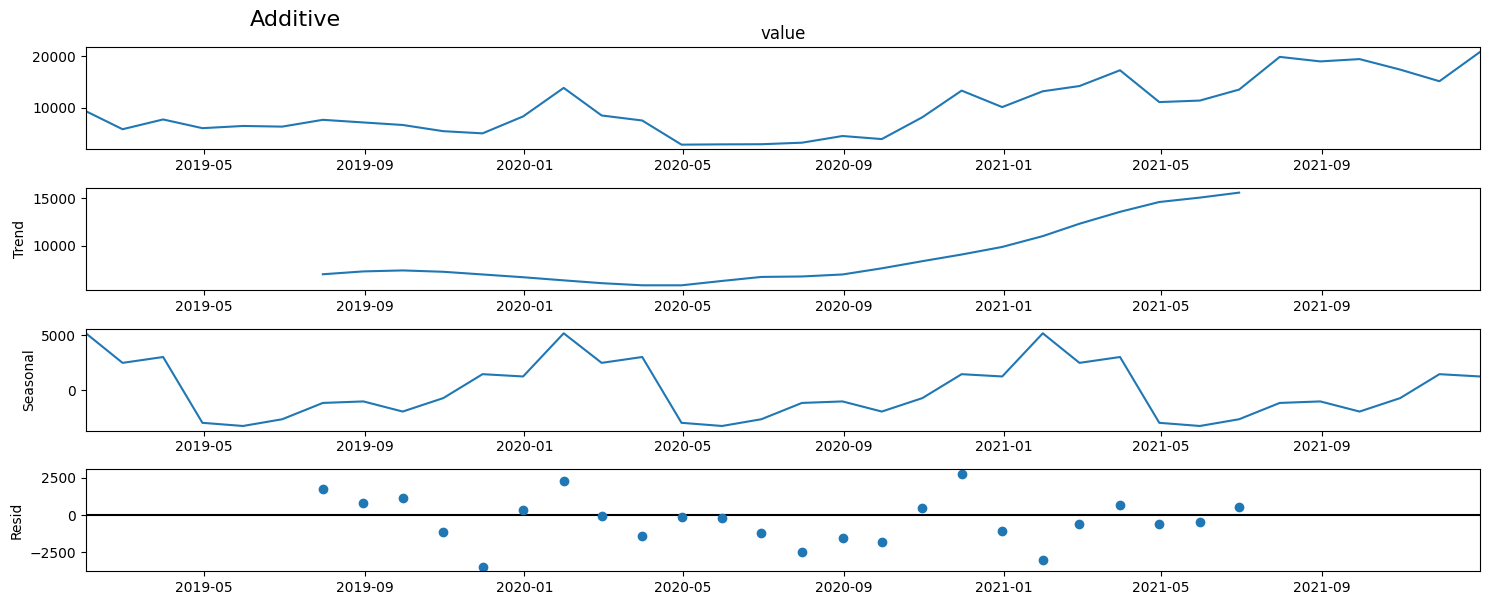

In [16]:
plt.rcParams['figure.figsize']=(15,6)
resultMulti.plot().suptitle("Multiplicative", fontsize=16, x=0.2, y=1)
resultAdd.plot().suptitle("Additive", fontsize=16,  x=0.2, y=1)
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

<font color=blue>
The additive model seems to be more applicable since the noise is centered around 0 - which is the expected behaviour for noise
</font>

# Forecasting#

### <font color=green> We use the ARIMA (Autoregressive integrated moving average) model</font>

#### We are going to train the model then evaluate its performance. <br>Then we will use all the data to train so we can forecast the cases for Jan 2022

In [17]:
endTrain=datetime.datetime(2020,12,31)
df3=df2.copy(deep=True)

In [18]:
df3["date1"]=df3.index
train=df3[df3.date1<=endTrain]
test=df3[df3.date1>endTrain]

In [19]:
print(train.shape)
print(test.shape)
train.head()

(24, 4)
(12, 4)


,county,value,date1,month
2019-01-31,Nairobi County,9329,2019-01-31,1
2019-02-28,Nairobi County,5814,2019-02-28,2
2019-03-31,Nairobi County,7719,2019-03-31,3
2019-04-30,Nairobi County,6021,2019-04-30,4
2019-05-31,Nairobi County,6449,2019-05-31,5


In [20]:
train=train.drop(["county", "date1", "month"], axis=1 )
test=test.drop(["county", "date1", "month"], axis=1)
train.head()

,value
2019-01-31,9329
2019-02-28,5814
2019-03-31,7719
2019-04-30,6021
2019-05-31,6449


In [22]:
#pip install pmdarima
from pmdarima.arima import auto_arima

In [23]:
model = auto_arima(train, error_action='ignore', suppress_warnings=True)

In [24]:
model.fit(train)

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [25]:
predicted=model.predict(n_periods=len(test))

In [26]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,predicted))
print("RMSE: ", rms)

RMSE:  9350.90527107589


In [27]:
data=test.copy(deep=True)
data["predicted"]=predicted
data

,value,predicted
2021-01-31,13210,8802.749228
2021-02-28,14229,8046.958434
2021-03-31,17304,7616.255783
2021-04-30,11105,7370.811176
2021-05-31,11401,7230.939609
2021-06-30,13543,7151.230971
2021-07-31,19913,7105.807394
2021-08-31,19031,7079.921851
2021-09-30,19482,7065.170451
2021-10-31,17433,7056.764068


### <font color=red> The prediction does not do so well. Lets see if we can do better<font>
### We will try and predict one value at a time then retrain

In [28]:
trainingData=list(df2["value"])
len(trainingData)
#The last years values are stored from position 24
#so the initial training data is from position 23 then we predict the value at position 23 first 
#then all athe way to the value at position 35
predicted=[]
for i in range(23, 35):
    model = auto_arima(trainingData[0:i], error_action='ignore', suppress_warnings=True)
    #model.fit(trainingData[0:i])
    val=model.predict(n_periods=1)[0]
    predicted.append(val)

In [29]:
actual=trainingData[24:36]

In [31]:
dfPredVsActual=pd.DataFrame({"actual":actual, "predicted":predicted})
dfPredVsActual

,actual,predicted
0,13210,10756.704598
1,14229,8802.749228
2,17304,11161.157655
3,11105,12452.454529
4,11401,15803.080625
5,13543,10227.559075
6,19913,10505.619773
7,19031,12263.975418
8,19482,19913.000000
9,17433,19031.000000


In [32]:
rms = sqrt(mean_squared_error(actual,predicted))
print("RMSE: ", rms)

RMSE:  4768.414501848099


# <font color=blue>Other possible applications of machine learning</font>

- ### Clustering
For this dataset we can try to see if there are counties that can be grouped together
We would try not to have too many predictors. For instances we for each county we can have the total cases for each of the three years as the attributes i.e. 2019 total cases, 2020 total cases and 2021 total cases before applying a learning algorithm such as <font color=red> kmeans algorithm </font> which is found in the  <font color=red> *cluster* </font> module of the  <font color=red> *sklearn(scikit-learn)* </font>package
- ### Regression  
This is predicting the value of a continuous variable from the input attribute e.g. The weight based on the height. 
Although for this dataset we can potentially use regression to calculate the value for year 4 based on the value for the previous three years, this data is best analysed a time series because of the seasonality component
The Algorithm mainly used for regression is  <font color=red> LinearRegression  </font> which is found in   <font color=red> sklearn.linear_model </font>. preprocessing e.g. by scaling of data using for example  <font color=red>sklearn.preprocessing.StandardScaler</font> is necessary in order to get good results
- ### Classification  
This is placing of a new observation into of of a finite number of classes e.g. sick of not sick 
This data does not rend itself well for classification because of lack of a label. There are many algorithms in scikit-learn used for classification including   <font color=red> k nearest neighbours (neighbors), LogisticRegression, naive_bayes, tree (decision tree), forest (Random Forest) etc.  </font>. preprocessing e.g. by scaling of data using for example  <font color=red>sklearn.preprocessing.StandardScaler</font> is necessary in order to get good results
- ### Collaborative filtering  
Not done much in this area but depending on the data, one may consider an application in this area

In [ ]:
## Predict for 2022.Assignment 
## lstm long short term memory

: 